In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [46]:
left_img = cv2.imread("left.bmp", 0)
right_img = cv2.imread("right.bmp", 0)

In [47]:
line_left = np.array([np.linspace(0, 1023, 1024), np.array([-1] * 1024)]).T
line_right = np.array([np.linspace(0, 1023, 1024), np.array([-1] * 1024)]).T

In [48]:
for j in range(1024):
    for i in range(1024):
        if left_img[j, i] == 255:
            line_left[j, 1] = i
        if right_img[j, i] == 255:
            line_right[j, 1] = i

In [49]:
line_left = line_left[line_left[:, 1] > 0]
line_right = line_right[line_right[:, 1] > 0]

In [61]:
func_left = np.polyfit(line_left[:, 0], line_left[:, 1], 1)
func_right = np.polyfit(line_right[:, 0], line_right[:, 1], 1)

In [94]:
center = [498, 391]  # x, y

x = np.linspace(0, 1023, 1024)
y_left = func_left[0] * x + func_left[1]
y_right = func_right[0] * x + func_right[1]

y = np.sqrt(500**2 - x[:501]**2)
y2 = np.sqrt(150**2 - (x[450:751] - 600)**2) + 600
y2_2 = -np.sqrt(150**2 - (x[450:751] - 600)**2) + 600

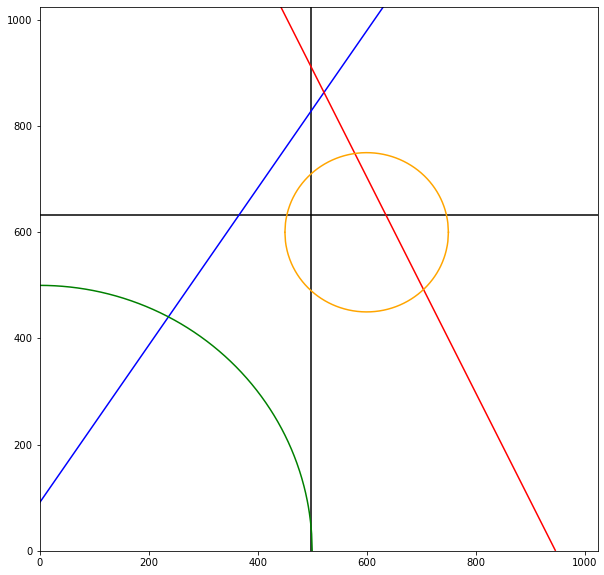

In [97]:
_, ax = plt.subplots(figsize=(10, 10))
plt.xlim(0, 1024)
plt.ylim(0, 1024)
ax.axvline(x=center[0], color='k')
ax.axhline(y=1024-center[1], color='k')
ax.plot(y_left, 1024-x, color='b')
ax.plot(y_right, 1024-x, color='r')
ax.plot(x[:501], y, color='g')
ax.plot(x[450:751], y2, color='orange')
ax.plot(x[450:751], y2_2, color='orange')
plt.show()

In [100]:
l0 = func_left[0] * center[0] + func_left[1]
r0 = func_right[0] * center[0] + func_right[1]
L = r0 - l0
L

393.9519175997437

In [ ]:
for j in range(1024):
    l_j = func_left[0] * j + func_left[1]
    r_j = func_right[0] * j + func_right[1]
    l = r_j - l_j
    a = l / L